In [1]:
import os
import sys
import re
import requests
from bs4 import BeautifulSoup
import pickle
sys.path.append('../')
import confana
#from common import *

oral: 60, spotlight: 284, poster: 2286
loading ./cache/NeurIPS/summary2021...
	125 Japanese authors out of all 11215 authors
	75 Japanese related papers out of all 2630 papers
oral: 2671, spotlight: 0, poster: 0
loading ./cache/NeurIPS/summary2022...
	135 Japanese authors out of all 11954 authors
	82 Japanese related papers out of all 2671 papers
oral: 67, spotlight: 378, poster: 2773
loading ./cache/NeurIPS/summary2023...
	152 Japanese authors out of all 15084 authors
	104 Japanese related papers out of all 3218 papers
Masashi Sugiyama	18
Kenji Kawaguchi	15
Taiji Suzuki	11
Shinji Ito	8
Tatsunori Hashimoto	7
Atsushi Nitanda	6
Seijin Kobayashi	6
Tomoharu Iwata	5
Atsutoshi Kumagai	5
Shinsaku Sakaue	5
Makoto Yamada	4
Sumeet Katariya	4
Tadashi Kozuno	4
Hidenori Tanaka	4
Masayoshi Tomizuka	4
Masatoshi Uehara	4
Taihei Oki	4
Yusuke Iwasawa	3
Daiki Chijiwa	3
Shin'ya Yamaguchi	3
Yasutoshi Ida	3
Kazuki Irie	3
Yasuhiro Fujiwara	3
Naonori Ueda	3
Naoya Takeishi	3
Taira Tsuchiya	3
Junya Honda	3
Kenj

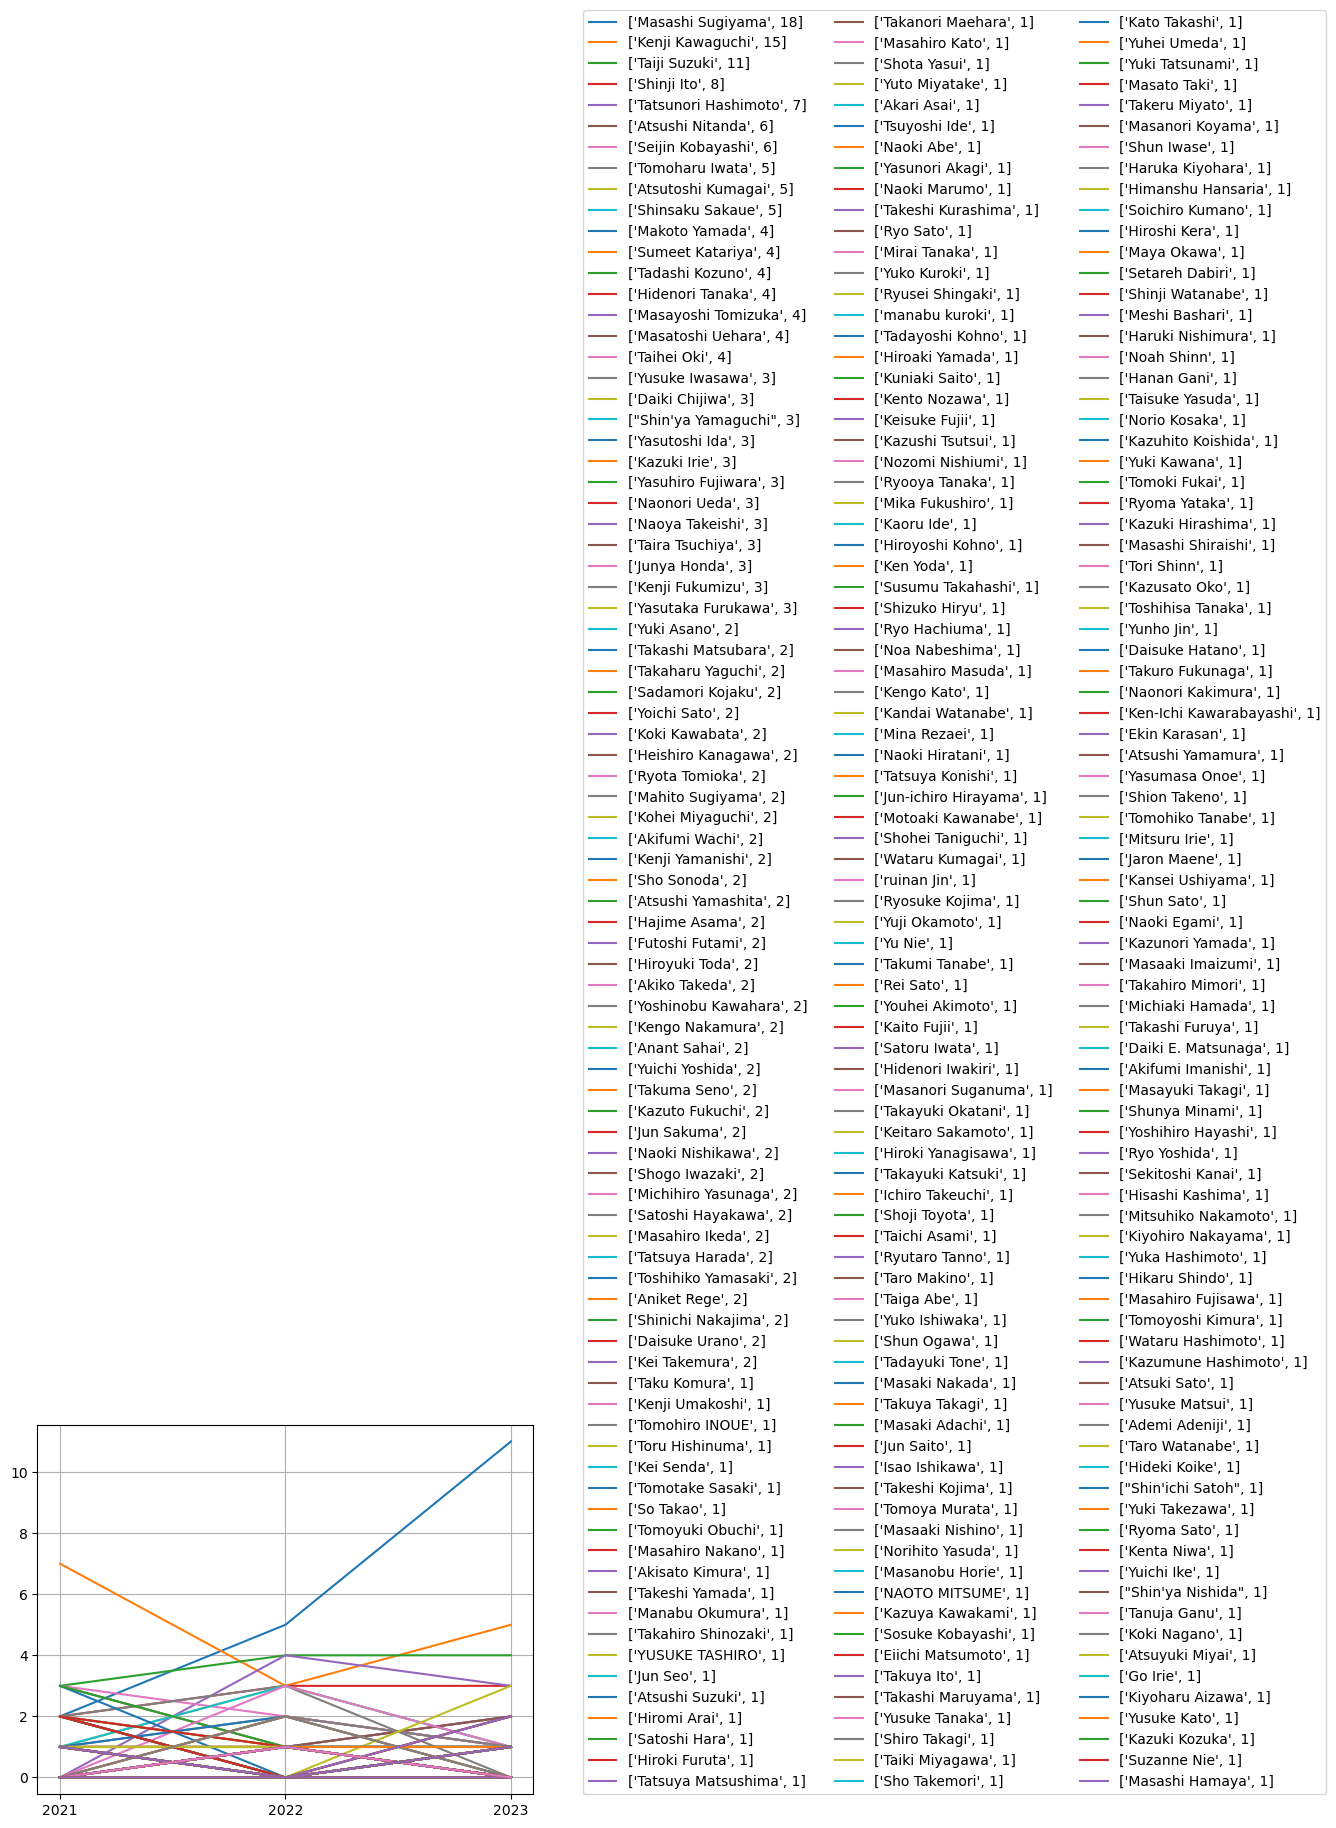

In [14]:
# configurations
#urlpre = 'https://openreview.net/group?id=ICLR.cc/'
#urlpre = 'https://openreview.net/group?id=robot-learning.org/CoRL/'
urlpre = 'https://openreview.net/group?id=NeurIPS.cc/'
urlpost = '/Conference'
since = 2021
until = 2023
#param = confana.set_param(urlpre, 'ICLR', since, until, 1, 1)
#param = confana.set_param(urlpre, 'CoRL', since, until, 1, 1)
param = confana.set_param(urlpre, 'NeurIPS', since, until, 1, 1)

ttlist = {}
aulist = {}
numor = {}
numsl = {}
numpo = {}
numppr = {}
jpppr = {}
jptitles = {}
jpauthors = {}
hist = {}
histall = {}

for ii in range(since,until+1,1):
    yr = str(ii)
    url = urlpre+yr+urlpost
    pklfl = param.cachedir + '/' + 'summary' + yr

    if os.path.exists(pklfl):
        with open(pklfl,'rb') as f:
            authorss,titles,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper, numoral, numsl, numposter = pickle.load(f)
            print(r'oral: {}, spotlight: {}, poster: {}'.format(numoral, numsl, numposter))
            print(f'loading {pklfl}...')
        print(f'\t{numjpauthors} Japanese authors out of all {numallauthors} authors')
        print(f'\t{numjppaper} Japanese related papers out of all {numpapers} papers')
    else:
        conf = param.conf_prefix + yr
        print(conf,'...')
        pu = confana.parseUrl(param,yr)
        print(url)
        normal, authorss, titles, numoral, numsl, numposter = pu.parseOpenReview(url)
        print(r'oral: {}, spotlight: {}, poster: {}'.format(numoral, numsl, numposter))
        if normal < 0: 
            print('parsing failed...')

        pAT = confana.parseATlist(titles, authorss)
        jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper = pAT.selectJP()
        hist = pAT.makehist(jpauthors,yr)

        with open(pklfl, 'wb') as f:
            pickle.dump((authorss,titles,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper, numoral, numsl, numposter), f)

        print(f'\t{numjpauthors} Japanese authors out of all {numallauthors} authors')
        print(f'\t{numjppaper} Japanese related papers out of all {numpapers} papers')
        
    #print(jpauthors)
    #for ii in range(0,len(jpauthors)):
    #    print(f'{jpauthors[ii]}\t{jptitles[ii]}')
    pAT = confana.parseATlist(titles, authorss)
    histall = pAT.mergehist(histall,hist,yr)

ph = confana.parseHist(param,histall)
ph.plotsorted()

In [13]:
import pickle
import re

for year in range(2018,2025,1):
    print("----")
    print(year)
    with open(param.cachedir + '/' +   'summary' + str(year) , 'rb' ) as f:
        authorss,titles,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper, numoral, numsl, numposter = pickle.load(f)

    numpaper = len(titles)
    pt = confana.parseTitle(titles)
    stwordhist = pt.wordfreq()
    for item in stwordhist:
        ratio = item[1]/numpaper
        if ratio > 0.005:
            #print("{0:}\t{1:}\t{2:.5f}".format(item[0],item[1],ratio))
            print("{0:}\t{1:.5f}".format(item[0],ratio))
            #print("{0:}: {1:}".format(item[0],item[1]))


----
2018
Reinforcement Learning	0.09496
Adversarial	0.07715
Generative	0.05341
Unsupervised	0.04154
Deep Learning	0.02671
Meta Learning	0.02374
Attention	0.02077
Latent	0.02077
Spars	0.01780
Embedding	0.01484
Question Answer	0.01187
Active Learning	0.01187
Continual Learning	0.01187
Bayesian	0.01187
Domain Adaptation	0.01187
Adversarial Training	0.00890
Language Model	0.00890
Disentangl	0.00890
Neural Network	0.00890
Unsupervised Learning	0.00890
Boosting	0.00593
Multi Task Learning	0.00593
Task Learning	0.00593
Visual Question Answering	0.00593
Precision Training	0.00593
Neural Networks	0.00593
Few Shot	0.00593
REINFORCEMENT LEARNING	0.00593
Incremental Learning	0.00593
label	0.00593
Machine Learning	0.00593
Diffusion	0.00593
Frame	0.00593
domain adaptation	0.00593
Bandit	0.00593
Online Learning	0.00593
META LEARNING	0.00593
Multi Agent	0.00593
----
2019
Adversarial	0.07968
Reinforcement Learning	0.06773
Generative	0.04382
Meta Learning	0.03586
Unsupervised	0.02390
Bayesian	0.01992
D